In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics
from scipy import stats

# dataset exlporing

In [2]:
laptop_ds = pd.read_csv('../input/laptop-price/laptop_price.csv', encoding = 'ISO-8859-1')

In [3]:
laptop_ds.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
laptop_ds.index

RangeIndex(start=0, stop=1303, step=1)

In [5]:
laptop_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
laptop_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


In [7]:
laptop_ds.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

Text(6, 0, 'missing data with yellow')

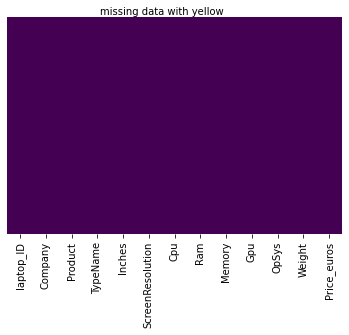

In [8]:
sns.heatmap(laptop_ds.isna(), cmap = "viridis", cbar = False, yticklabels = False, xticklabels = True)
plt.text(6, 0, "missing data with yellow", ha = "center" , va = "bottom")

In [9]:
round(laptop_ds['Company'].value_counts() / laptop_ds.shape[0] * 100, 2)

Dell         22.79
Lenovo       22.79
HP           21.03
Asus         12.13
Acer          7.90
MSI           4.14
Toshiba       3.68
Apple         1.61
Samsung       0.69
Razer         0.54
Mediacom      0.54
Microsoft     0.46
Xiaomi        0.31
Vero          0.31
Chuwi         0.23
Google        0.23
Fujitsu       0.23
LG            0.23
Huawei        0.15
Name: Company, dtype: float64

# label Encoding 

In [10]:
laptop_ds.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [11]:
laptop_coded = laptop_ds.copy(deep = True)

In [12]:
les = {}
for i in (['Company', 'Product', 'TypeName',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']) :
    les[i] = LabelEncoder()
    laptop_coded[i] = les[i].fit_transform(laptop_coded[i])
    

Text(0.5, 1.0, 'coorelations between our features')

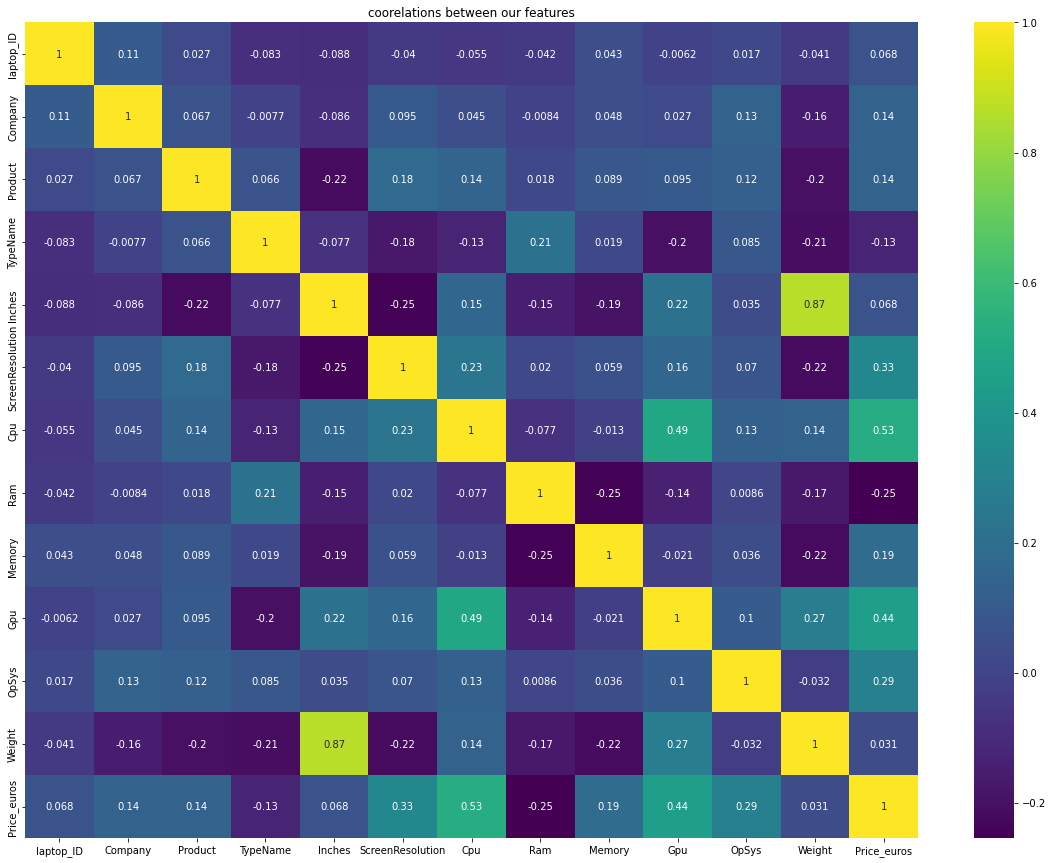

In [13]:
plt.figure(figsize = (20, 15))
sns.heatmap(laptop_coded.corr(), annot = True, cmap = "viridis")
plt.title("coorelations between our features")

In [14]:
print("                Good coorelations")
for i in range(len(laptop_coded.columns)) :
    for j in range(i) :
        if (laptop_coded.corr().iloc[i,j] != 1  and  abs(laptop_coded.corr().iloc[i,j] > 0.4 )) :
            print("(" + laptop_coded.columns[i] + ") and (" + laptop_coded.columns[j] + ")", end = "")
            print("     with correlation  " ,  laptop_coded.corr().iloc[i,j])

                Good coorelations
(Gpu) and (Cpu)     with correlation   0.4907609282912895
(Weight) and (Inches)     with correlation   0.8663041746163783
(Price_euros) and (Cpu)     with correlation   0.5293338014023624
(Price_euros) and (Gpu)     with correlation   0.443298803239766


# Data Visiualization

In [15]:
laptop_ds['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [16]:
laptop_ds.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

# bi-varient charts

In [17]:
bi_vars_with_price = ['Company', 'Ram', 'ScreenResolution', 'OpSys','TypeName', 'Inches', 'Memory']

In [18]:
def plot_cat_vars (df, var) :
    plt.figure(figsize = (15, 7))
    plt.title("distribution of " + var + "and Price_euros")
    sns.barplot(x = var, y = 'Price_euros', data = df)
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Price_in_euro')
    plt.show()

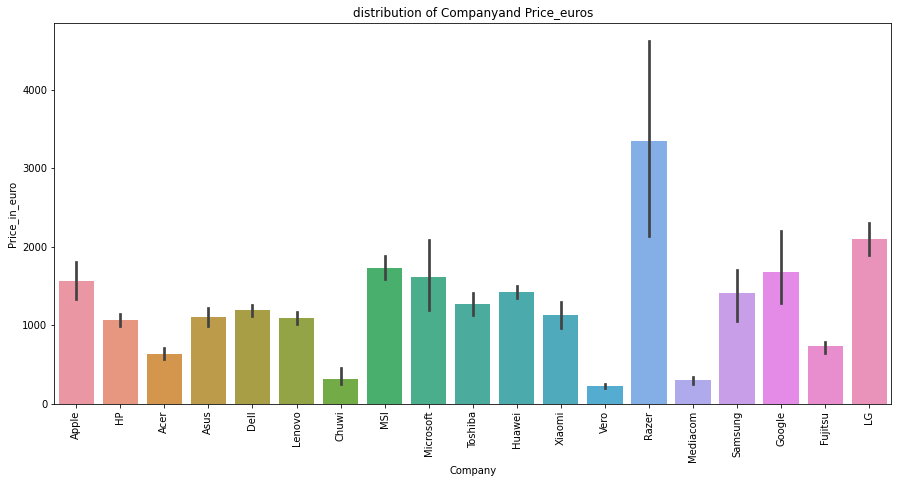

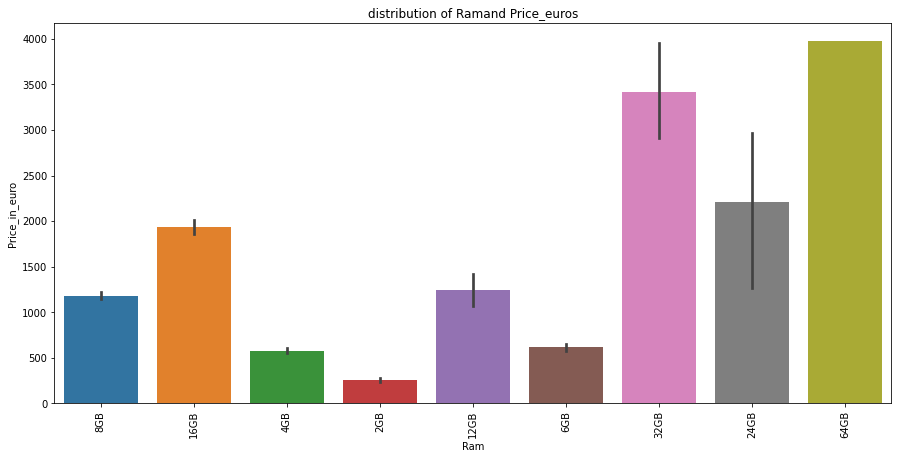

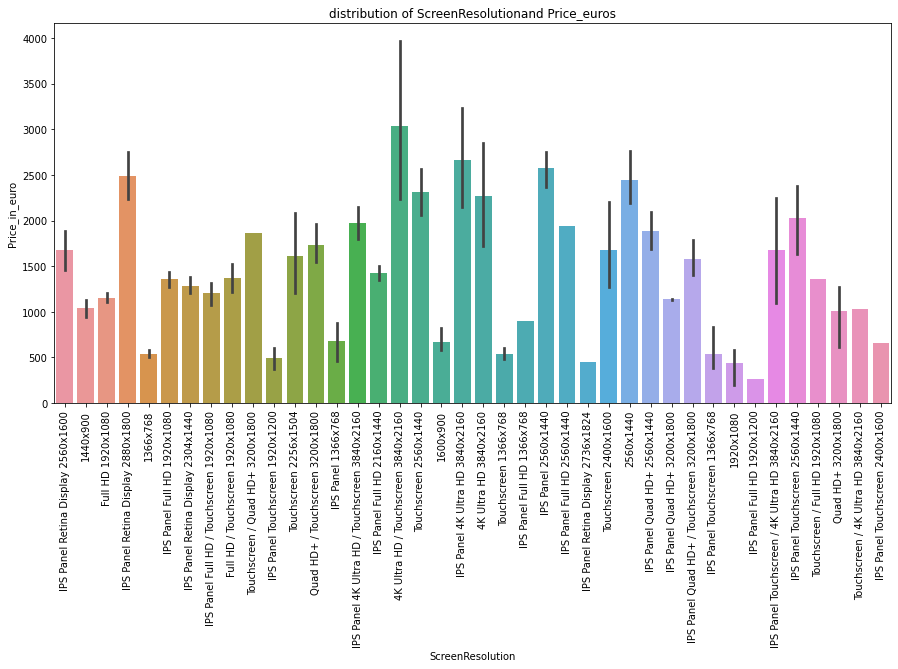

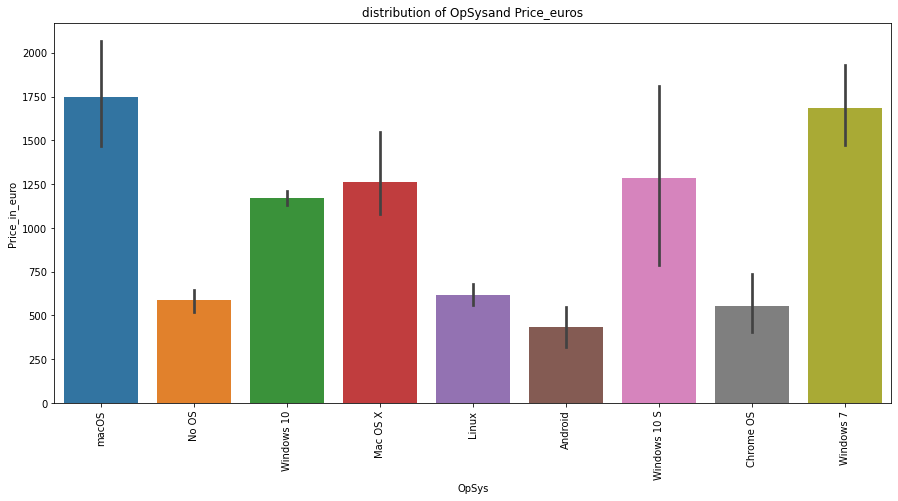

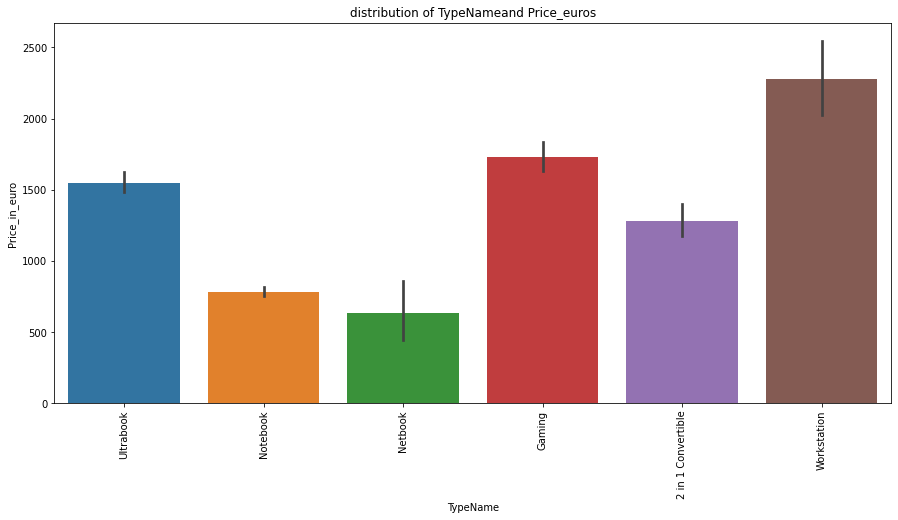

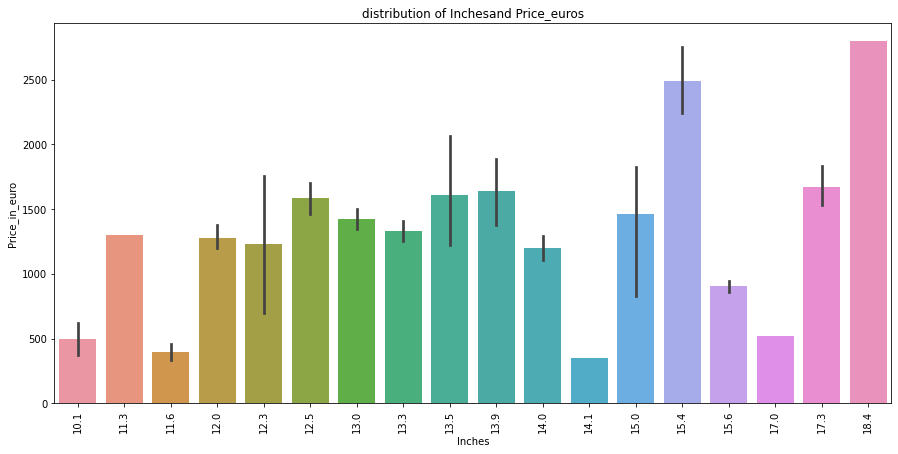

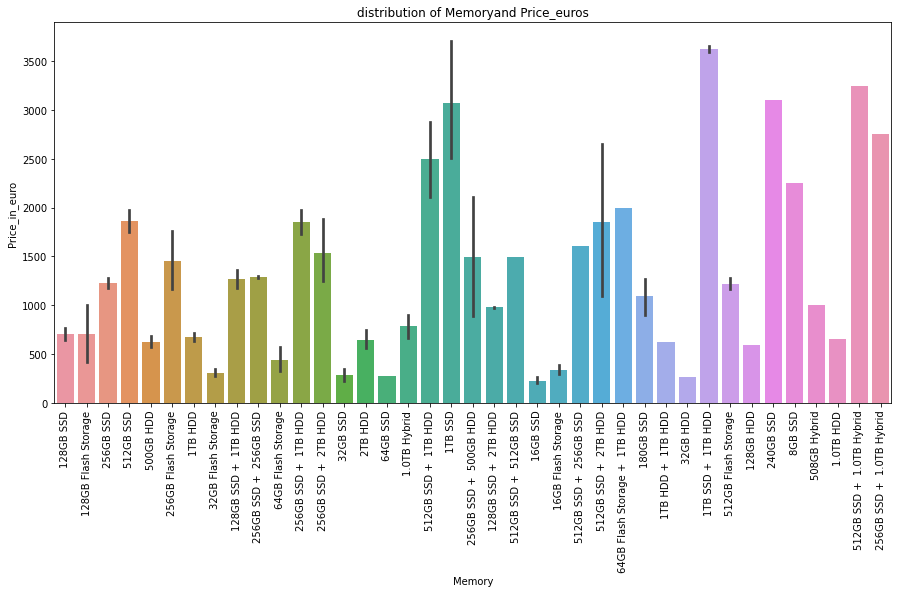

In [19]:
for var in bi_vars_with_price :
    plot_cat_vars(laptop_ds, var)

In [20]:
laptop_ds['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

# early conclusions

### 1-The heightest price laptops are of the following categories
###        1- Work station laptops
###        2- high memory capacity (1 tb ssd and 1 tb hdd)
###        3- big inches (18 inche)
###        4- 64 GB Ram 
###        5- Mac-os operating system
###        6- 4k ultra hd / touch screen (3840 * 2160) resolution
###        7- Razer company
### __________________________________________________________________
### 2-The moderate price laptops are of the following categories
###        1- 2 in 1 convertable laptops
###        2- moderate memory capacity (512 GB ssd and 256 GB ssd)
###        3- moderate inches (14 inche)
###        4- 24 GB Ram 
###        5- windows 10 operating system
###        6- touch screen (2400 * 1600) resolution
###        7- microsoft and huawei companies
###___________________________________________________________________
### 3-The lowest price laptops are of the following categories
###        1- Netbook laptops
###        2- low memory capacity (32 Gb flash memorya)
###        3- moderate inches (14.1 inche)
###        4- 2 GB Ram 
###        5- android operating system
###        6- 4k ultra hd / touch screen (1920 * 1080) resolution
###        7- vero company

# Multi_varient charts 

In [21]:
laptop_ds['Price_euros'].describe()

count    1303.000000
mean     1123.686992
std       699.009043
min       174.000000
25%       599.000000
50%       977.000000
75%      1487.880000
max      6099.000000
Name: Price_euros, dtype: float64

In [22]:
def categorize_the_prices (df) :
    if df['Price_euros'] < 500 :
        return 'Low category'
    if df['Price_euros'] >= 500 and df['Price_euros'] < 1500:
        return 'moderate category'
    if df['Price_euros'] >= 1500 and df['Price_euros'] < 4000 :
        return 'high category'
    if df['Price_euros'] >= 4000 :
        return 'very high category'

In [23]:
laptop_ds['Price_cat'] = laptop_ds.apply(categorize_the_prices , axis = 1)

In [24]:
def cluster_charts (df, var1, var2) :
    df.groupby([var1, var2]).size().unstack(fill_value = 0).plot.bar(figsize = (20,10), title = (var1 + " vs " + var2))
    plt.ylabel("Freq")
    plt.show()

In [25]:
multi_var = ['Company', 'Ram', 'ScreenResolution', 'OpSys','TypeName', 'Inches', 'Memory']

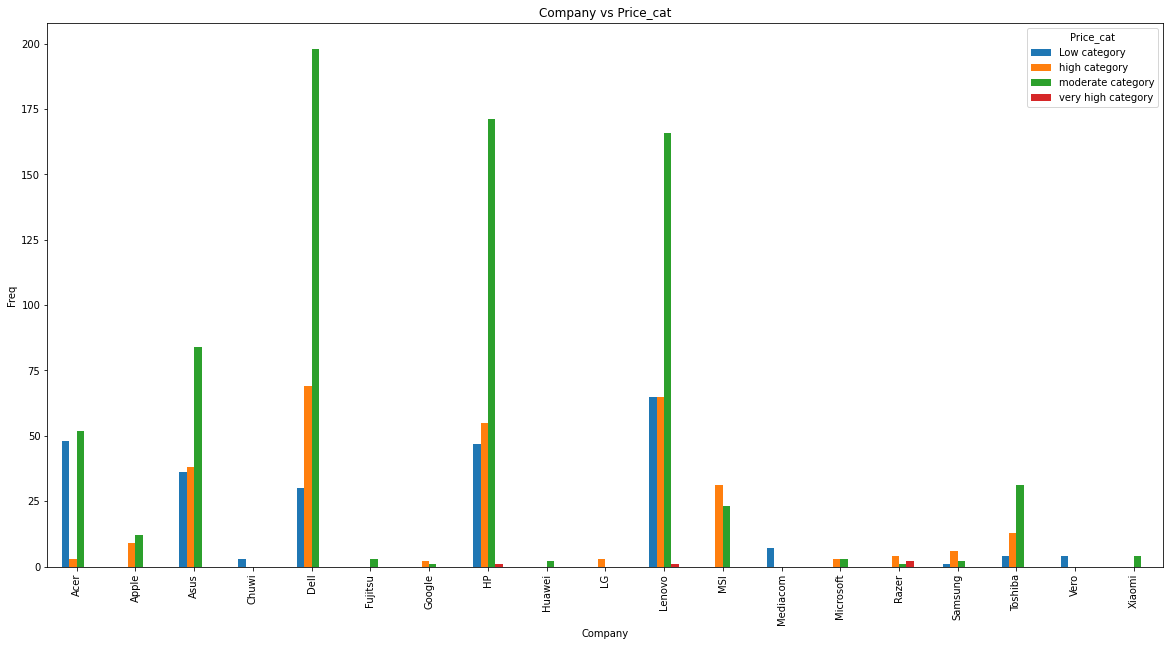

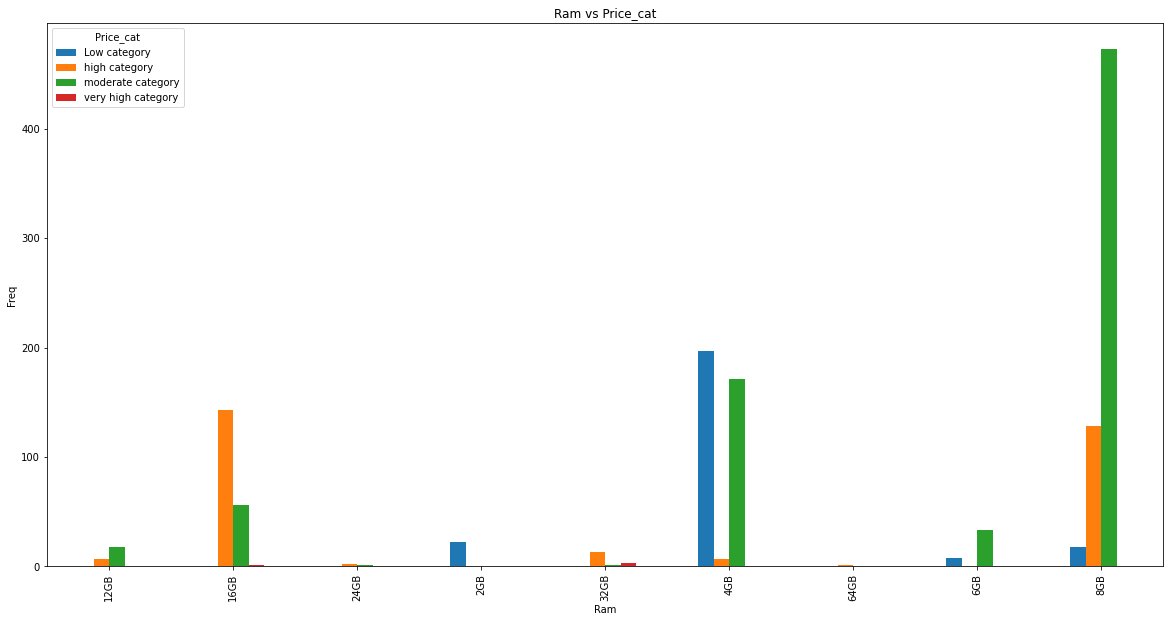

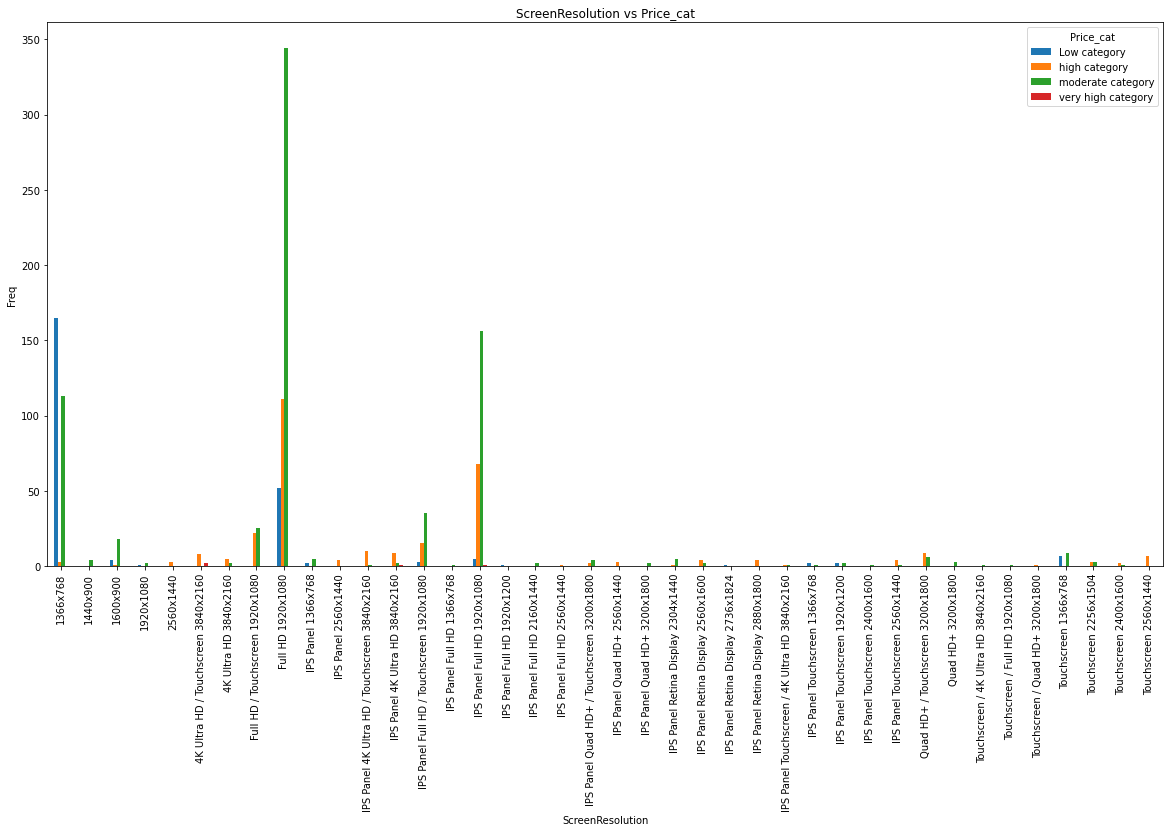

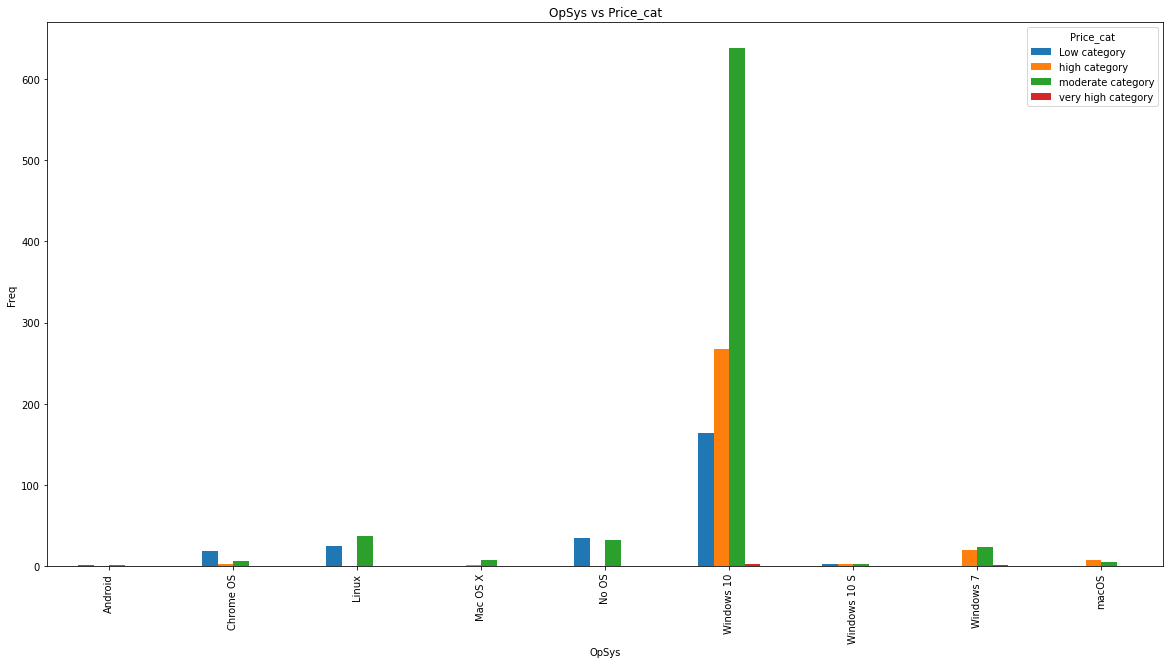

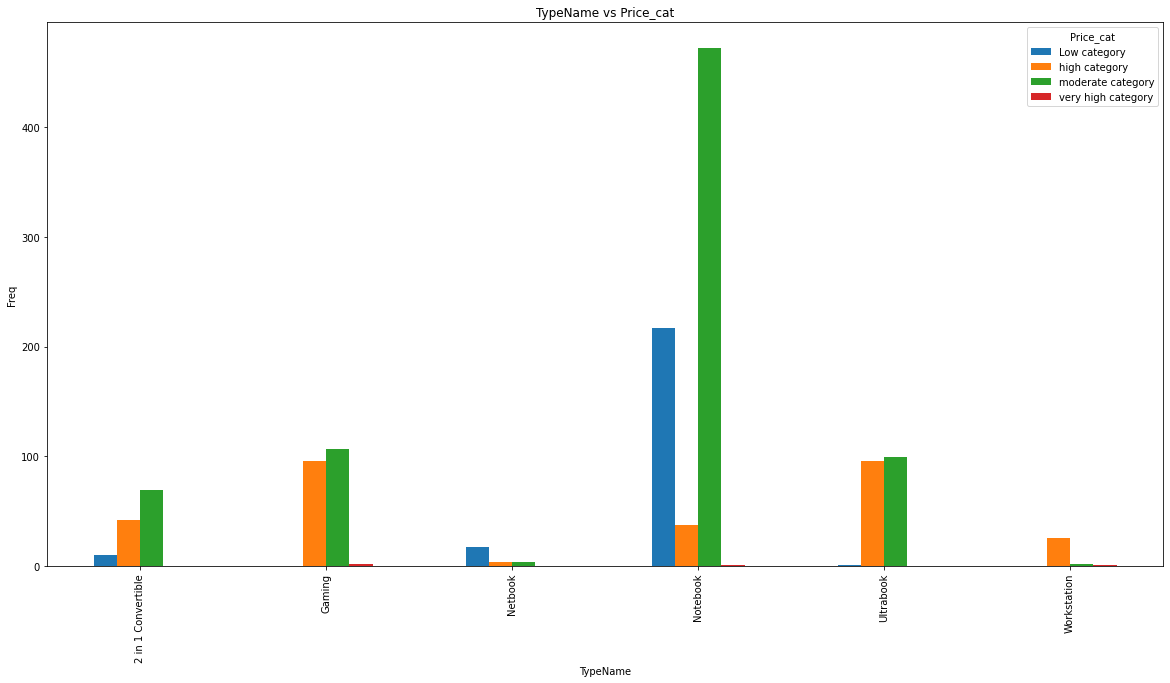

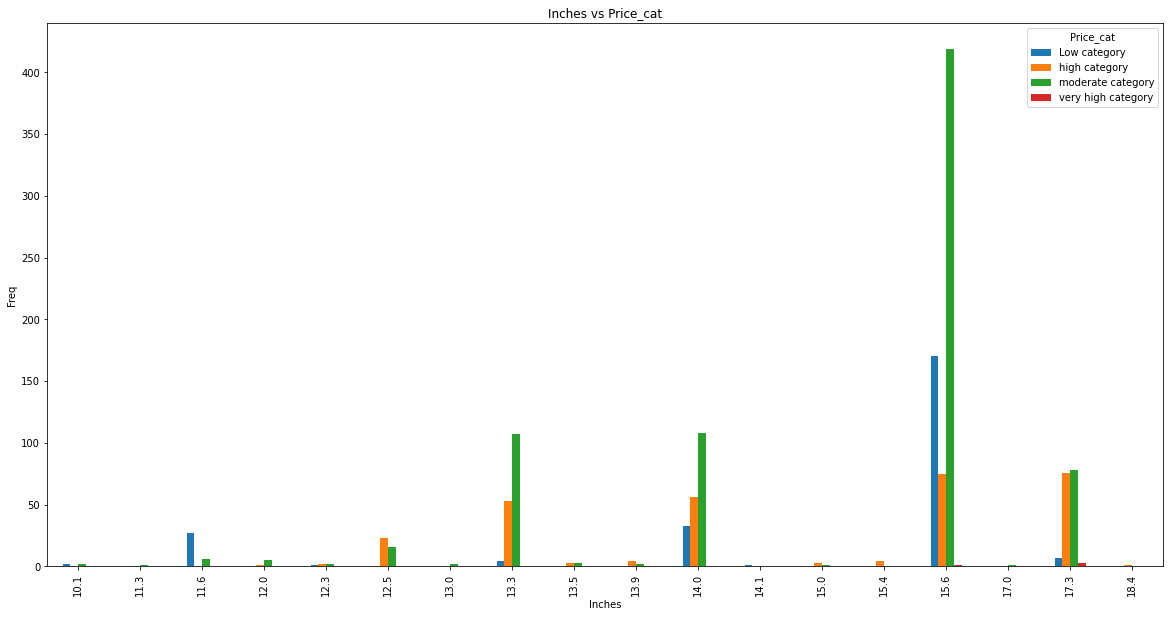

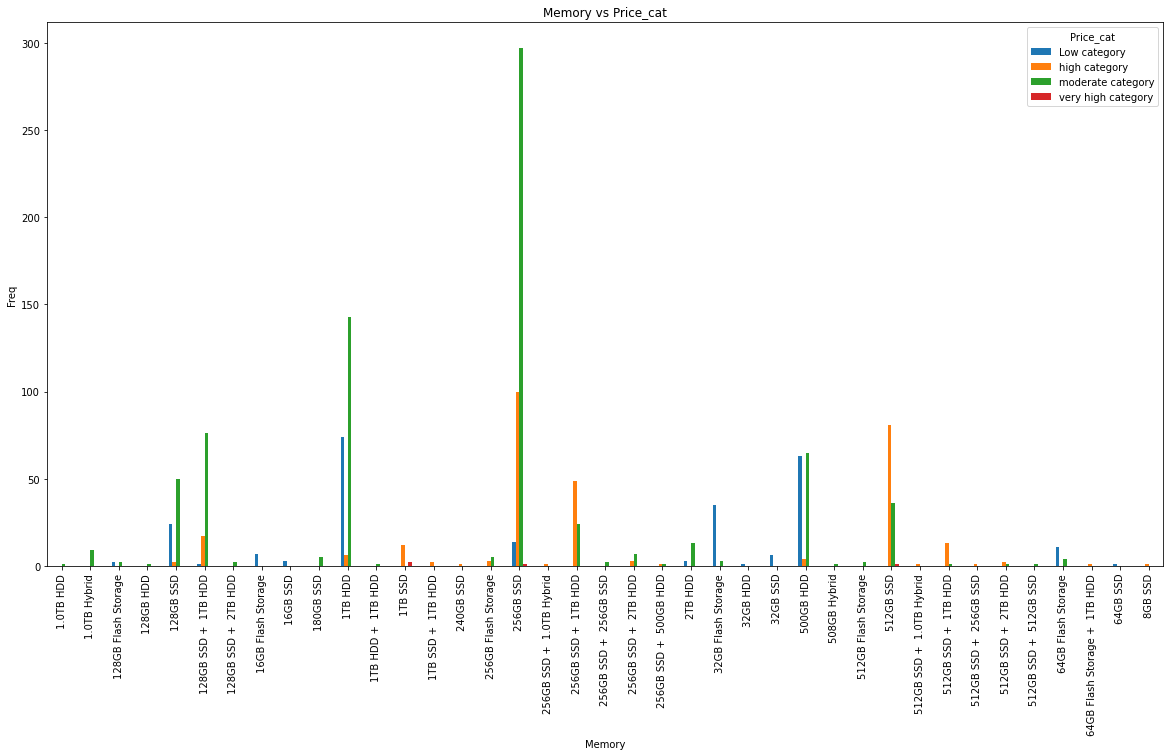

In [26]:
for var1 in multi_var :
    cluster_charts(laptop_ds, var1, 'Price_cat')

# After multi charts conclusion

### 1- most very high category price laptops are produced by lenovo , hp and razer 
### 2- most very high category laptop are of type gaming and notebook
### 3- moderate category laptops have the highest rate of production
### 4- every cat laptop have memory , screen resolution , ram , inches compatable with its category

In [27]:
laptop_ds['Weight'] = laptop_ds['Weight'].str.replace('kg', '')
laptop_ds['Ram'] = laptop_ds['Ram'].str.replace('GB', '')
laptop_ds['Weight'] = laptop_ds['Weight'].astype(float)
laptop_ds['Ram'] = laptop_ds['Ram'].astype(int)

In [28]:
def plot_scatter(df, var1, var2) :
    plt.figure(figsize = (15,7))
    plt.title("scatter " + var1 + " vs " + var2)
    plt.scatter(x = df[var1], y = df[var2], c = "green")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

In [29]:
scatter_vars = ['Inches','Ram', 'Weight']

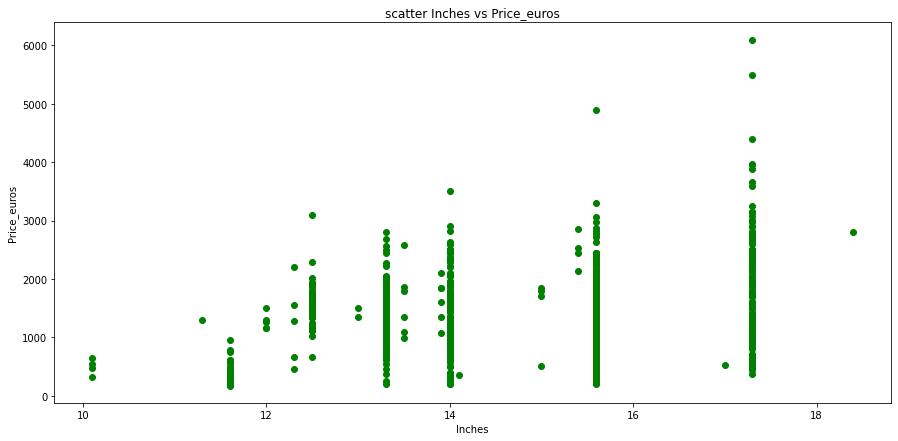

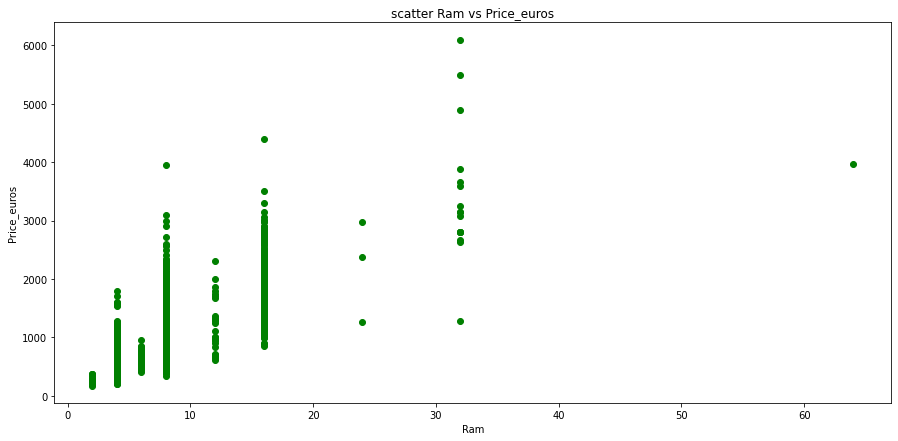

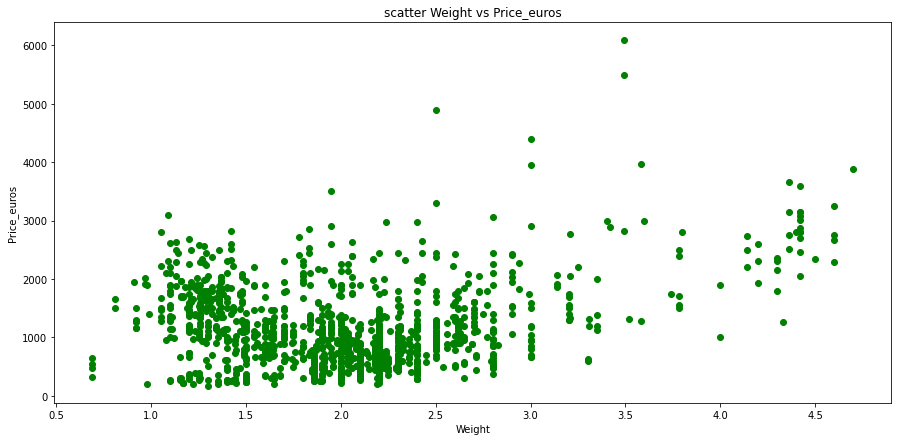

In [30]:
for var in scatter_vars :
    plot_scatter(laptop_ds, var, 'Price_euros')

# as the weight increase the price also increase

In [31]:
companies = ['Dell', 
'Lenovo',
'HP',
'Asus',
'Acer',
'MSI',
'Toshiba',
'Apple',
'Samsung',
'Razer',
'Mediacom',
'Microsoft',
'Vero',
'Xiaomi',         
'LG',
'Chuwi',
'Google',
'Fujitsu',
'Huawei']

In [32]:
len(laptop_ds.Price_cat.unique())

4

In [33]:
def pie_chart(df, cat) :
    exp_arr = [(0.025), (0.025,0.025), (0.025,0.025,0.025), (0.025,0.025,0.025,0.025)]
    df2 = df.groupby(['Price_cat', df.Company[(df.Company == cat)]])
    if len(df2.Price_cat.unique())-1 > 0 :
        df2.size().unstack(fill_value = 0).plot.pie(colors = ['green', 'indigo', 'blue', 'red'], autopct = "%1.2f%%", shadow = True, subplots = True, figsize = (10,10), title = (cat + " production of laptops"), explode = (exp_arr[len(df2.Price_cat.unique())-1]))
    else :
        df2.size().unstack(fill_value = 0).plot.pie(colors = ['green', 'indigo', 'blue', 'red'], autopct = "%1.2f%%", shadow = True, subplots = True, figsize = (10,10), title = (cat + " production of laptops"))

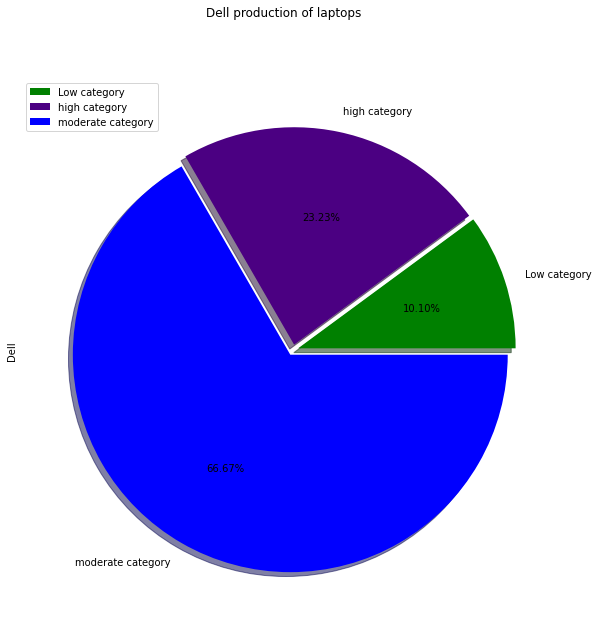

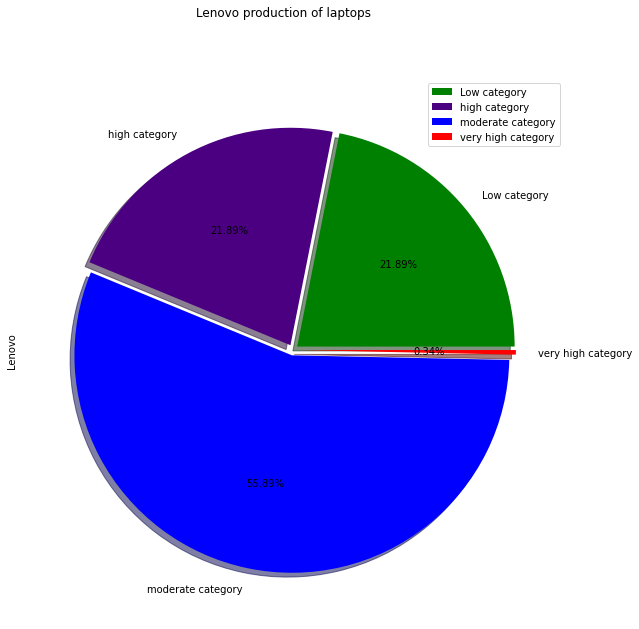

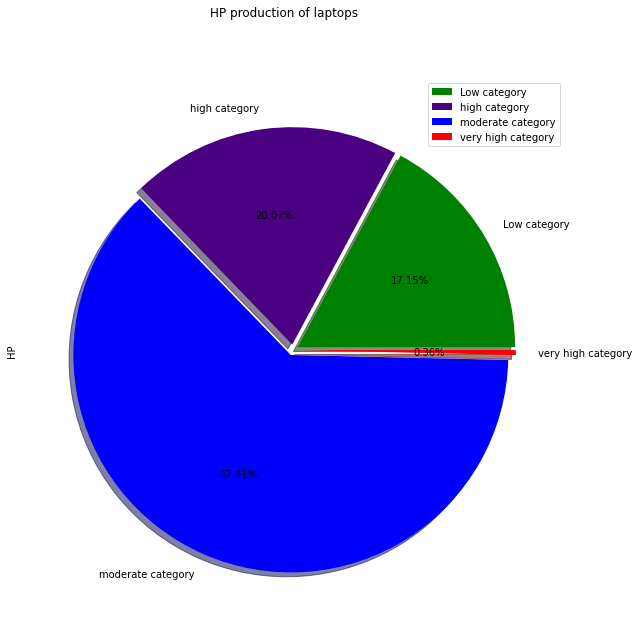

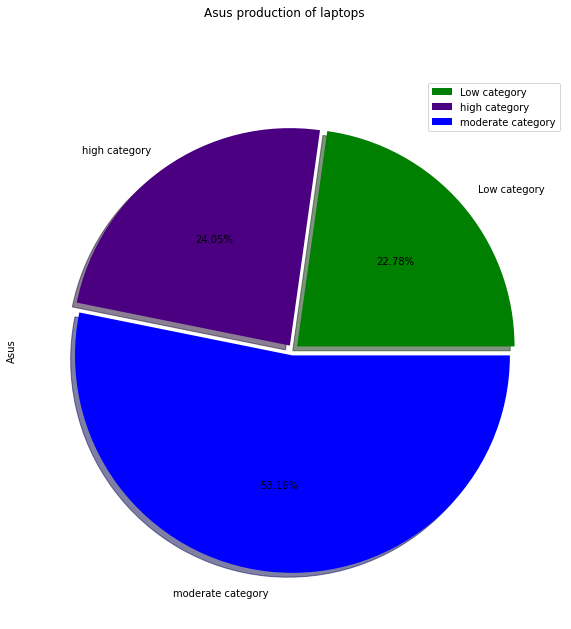

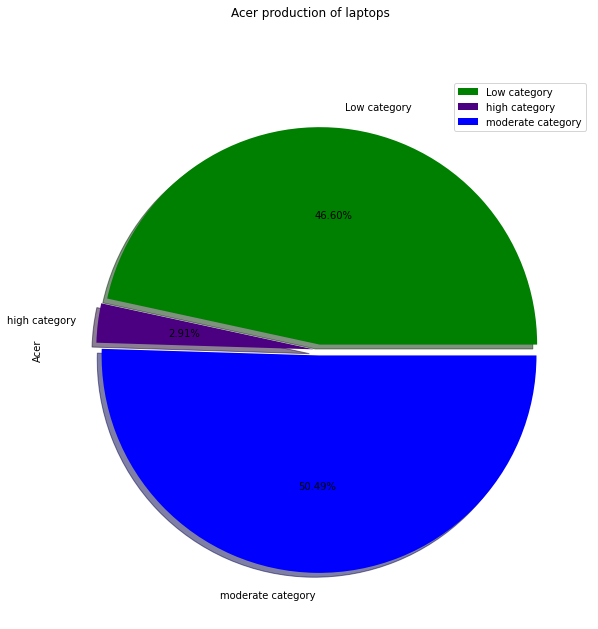

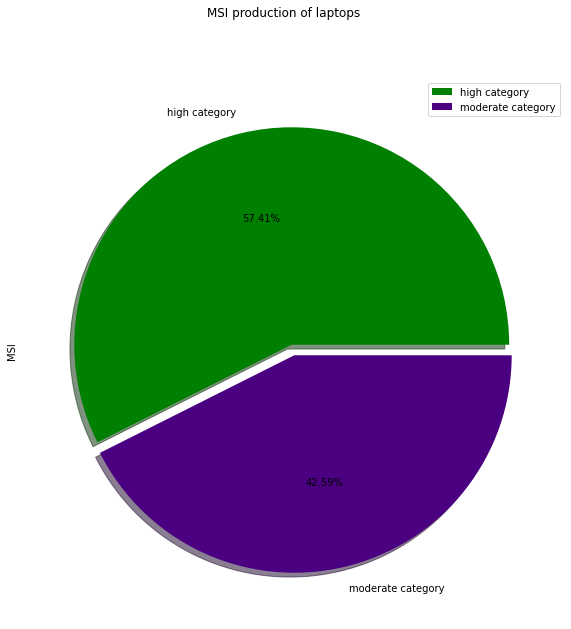

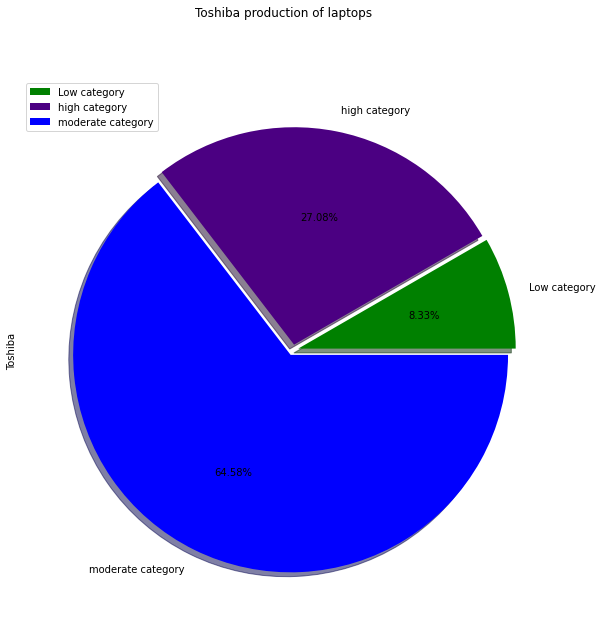

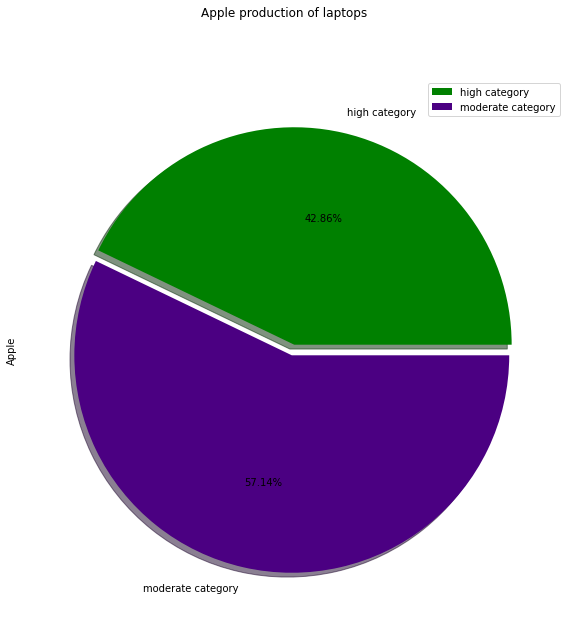

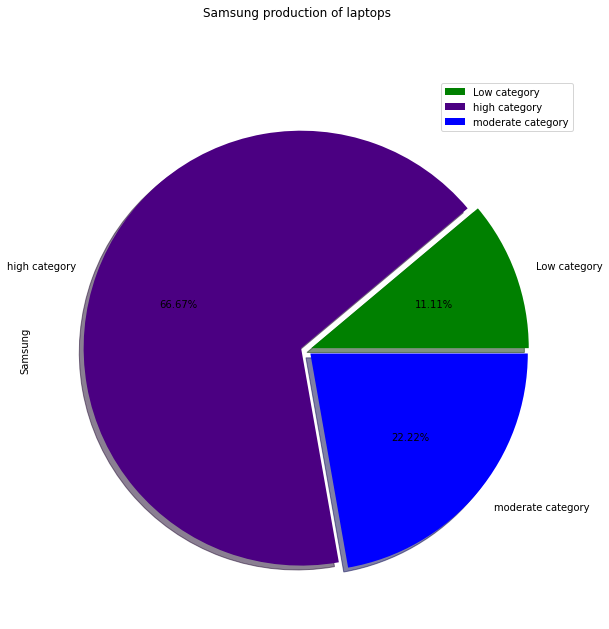

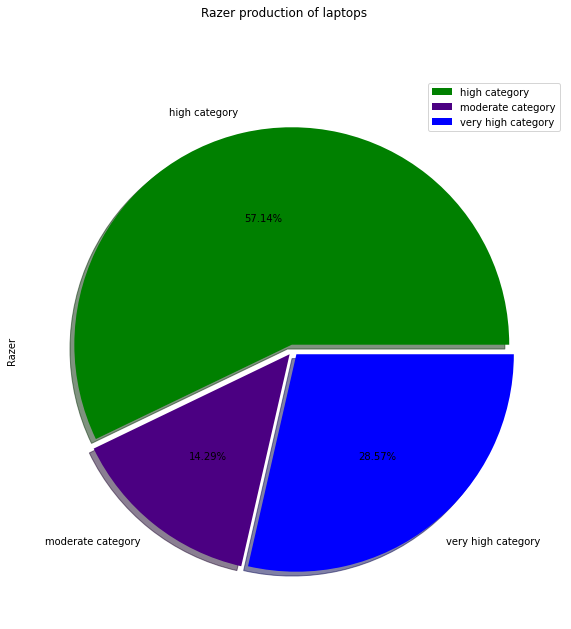

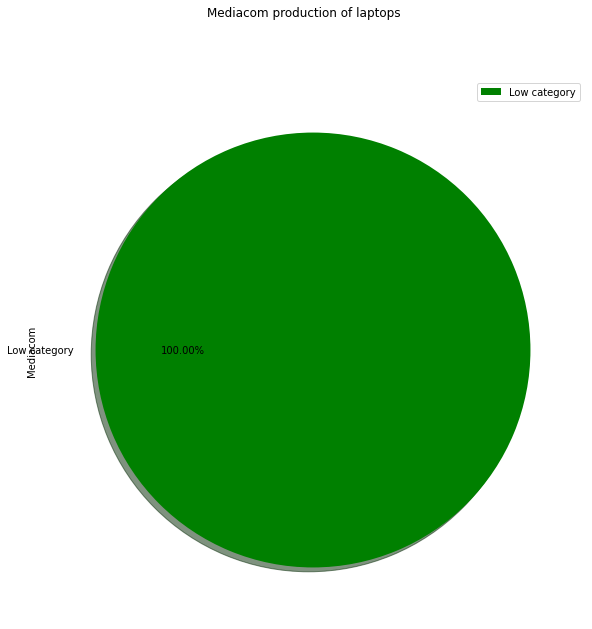

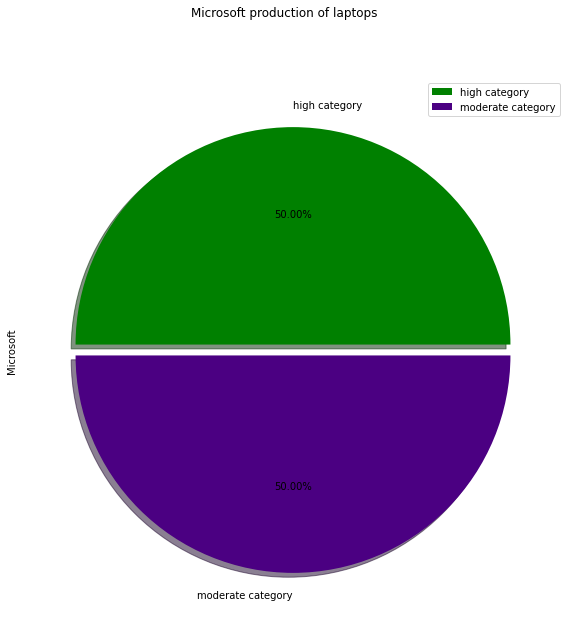

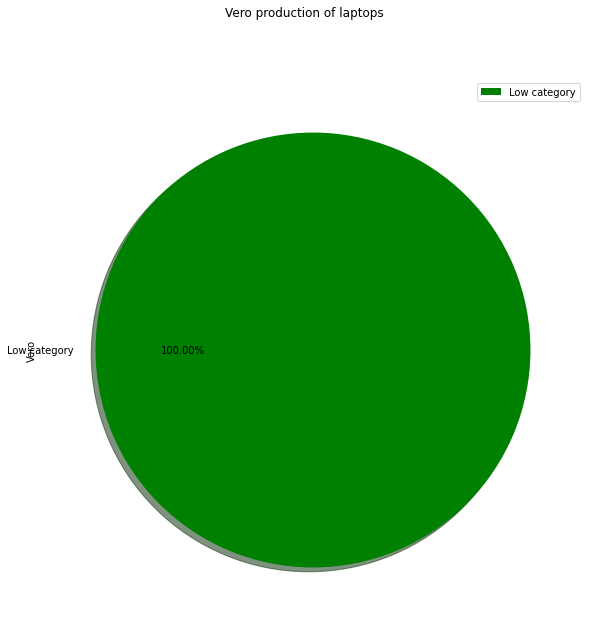

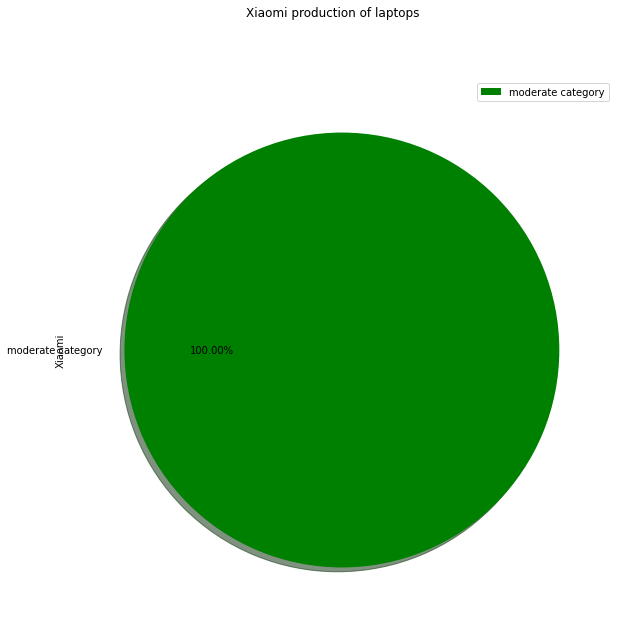

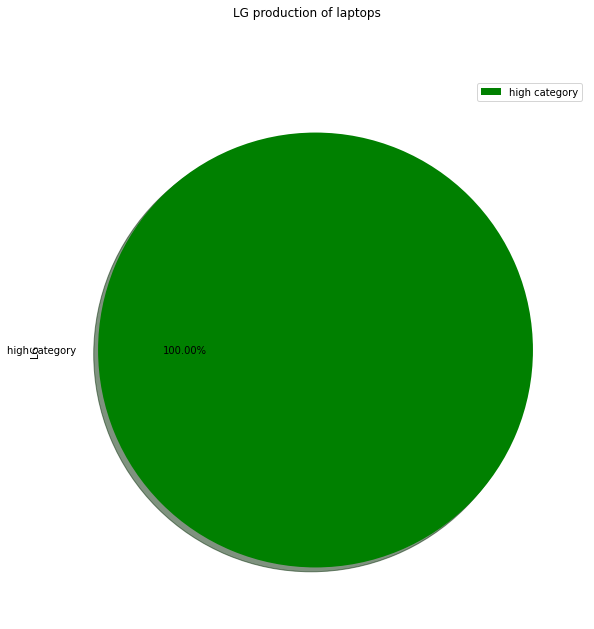

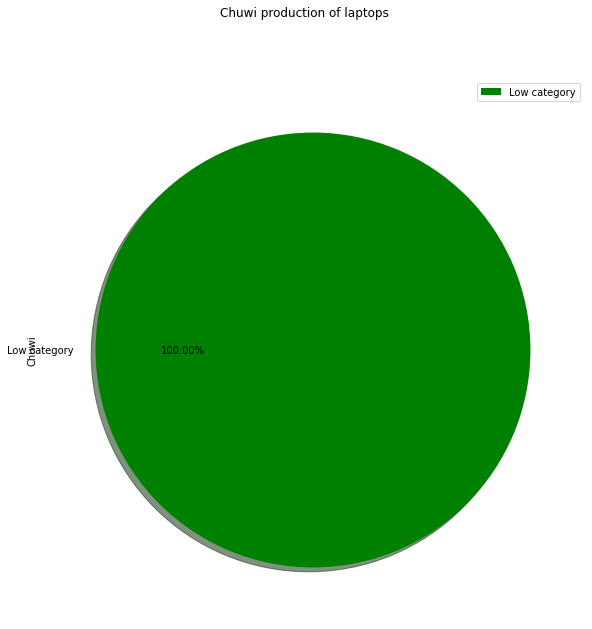

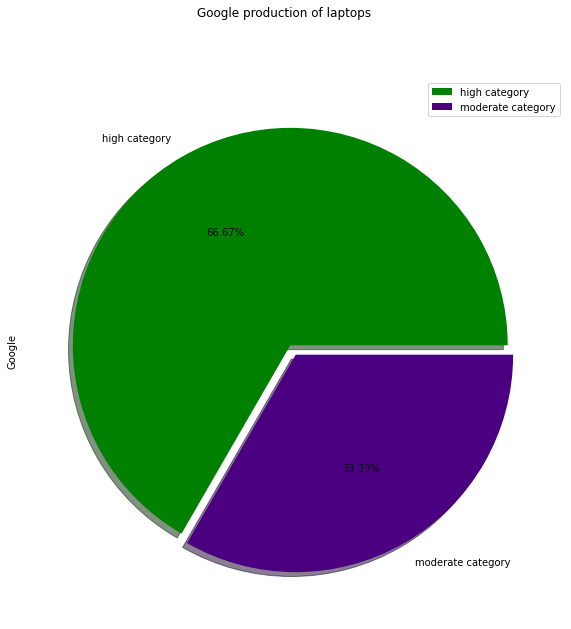

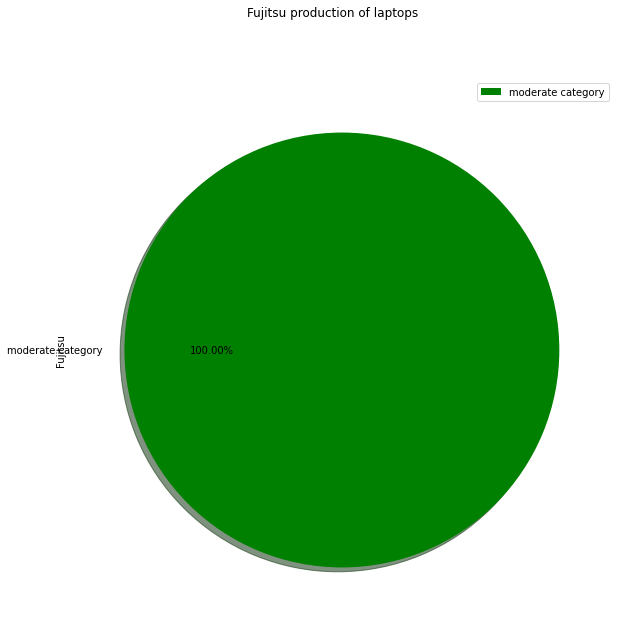

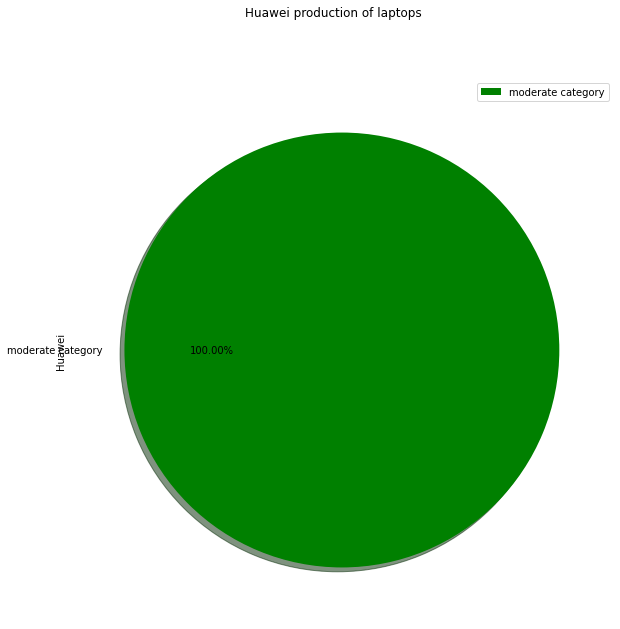

In [34]:
for company in companies :
    pie_chart(laptop_ds, company)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

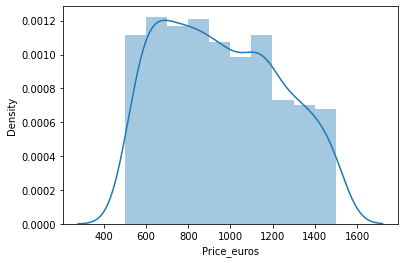

In [35]:
sns.distplot(laptop_ds.Price_euros[(laptop_ds.Price_cat == "moderate category")])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

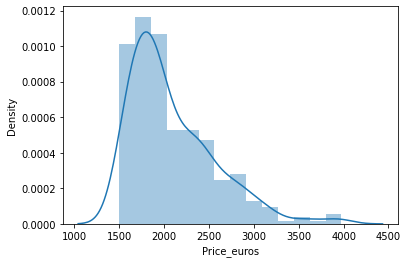

In [36]:
sns.distplot(laptop_ds.Price_euros[(laptop_ds.Price_cat == "high category")])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

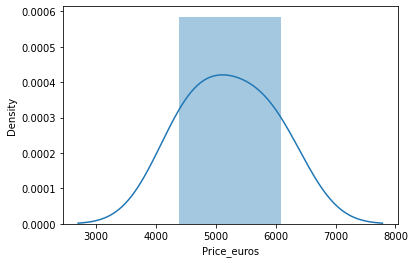

In [37]:
sns.distplot(laptop_ds.Price_euros[(laptop_ds.Price_cat == "very high category")])

In [38]:
laptop_ds['Price_cat'].value_counts()

moderate category     753
high category         301
Low category          245
very high category      4
Name: Price_cat, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

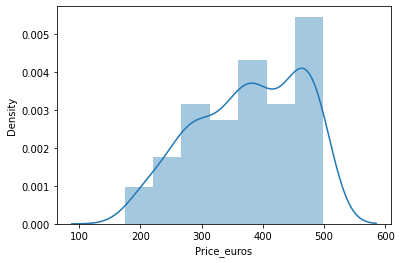

In [39]:
sns.distplot(laptop_ds.Price_euros[(laptop_ds.Price_cat == "Low category")])

# modeling 

In [40]:
laptop_ds.drop('laptop_ID', axis = 1, inplace = True)

In [41]:
laptop_model = laptop_ds.copy(deep = True)

In [42]:
les = {}
for i in (['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']) :
    les[i] = LabelEncoder()
    laptop_model[i] = les[i].fit_transform(laptop_model[i])

In [43]:
x_train, x_test, y_train, y_test = train_test_split(laptop_model.drop(['Price_euros', 'Price_cat'], axis = 1).values, laptop_model['Price_euros'].values, random_state = 42, test_size = 0.25)

# XGboost regressor

In [44]:
xgb = XGBRegressor(
    objective = "reg:linear",
    seed = 200,
    n_estimators = 200,
    learning_rate = 0.1,
    gamma = 0.1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 1,
    reg_lambda = 1,
    silent = False
)

In [45]:
xgb.fit(x_train, y_train)

[03:17:11] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:17:11] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=200, reg_alpha=1, reg_lambda=1, scale_pos_weight=1,
             seed=200, silent=False, subsample=0.8, tree_method='exact',
             validate_parameters=1, ...)

In [46]:
predicted = xgb.predict(x_test)

In [47]:
print("The mean square error is : ", metrics.mean_squared_error(y_test, predicted))

The mean square error is :  61441.92044259369


In [48]:
print("accuracy is : ", xgb.score(x_test, y_test))
print("pearson's correlation is : ", stats.pearsonr(y_test, predicted)[0])

accuracy is :  0.8844719802276263
pearson's correlation is :  0.9409215218280388


# Grid search

In [49]:
params = {
    'seed' : [100 , 150 , 200, 250],
    'n_estimators' : [100 , 150 , 200, 250, 300],
    'learning_rate' : [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
}

In [50]:
grid = GridSearchCV(estimator = xgb, param_grid = params, n_jobs = -1, cv =3 , verbose = 1)

In [51]:
xgb_grid = grid.fit(x_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 26.6min


[03:17:17] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:17:17] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:18:46] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:18:46] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:20:24] WARNING: ../src/objective/regression_

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 137.8min



[04:52:27] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:27] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:54:33] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:33] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:56:19] WARNING: ../src/objective/regression

[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 262.9min finished


[07:40:05] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:40:05] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [52]:
print("best_score : " + str(xgb_grid.best_score_) + " with best params : " + str(xgb_grid.best_params_))

best_score : 0.8581697883854785 with best params : {'learning_rate': 0.05, 'n_estimators': 300, 'seed': 150}


In [53]:
xgb_grid_model = xgb_grid.best_estimator_
predicted_xgb_grid = xgb_grid_model.predict(x_test)
print("accuracy is : ", xgb_grid_model.score(x_test, y_test))
print("pearson's correlation is : ", stats.pearsonr(y_test, predicted_xgb_grid)[0])
print("The mean square error is : ", metrics.mean_squared_error(y_test, predicted_xgb_grid))

accuracy is :  0.881713859426281
pearson's correlation is :  0.9395555774594037
The mean square error is :  62908.78743452533


# Linear regression

In [54]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [55]:
predicted_lr = lr.predict(x_test)

In [56]:
print(metrics.mean_squared_error(y_test, predicted_lr))

193023.6624894416


In [57]:
print("accuracy is : ", lr.score(x_test, y_test))
print("pearson's correlation is : ", stats.pearsonr(y_test, predicted_lr)[0])

accuracy is :  0.6370614502935148
pearson's correlation is :  0.801579477755835


# Support vector machine regressor

In [58]:
svm = SVR(kernel = 'rbf', C = 65000 ,epsilon = 25)
svm.fit(x_train, y_train)
predicted_svm = svm.predict(x_test)

In [59]:
metrics.mean_squared_error(y_test, predicted_svm)

163573.16104560276

In [60]:
print("accuracy is : ", svm.score(x_test, y_test))
print("pearson's correlation is : ", stats.pearsonr(y_test, predicted_svm)[0])

accuracy is :  0.6924366418337762
pearson's correlation is :  0.8338880350046373


In [61]:
laptop_model.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_cat
0,1,300,4,13.3,23,65,8,4,58,8,1.37,1339.69,moderate category
1,1,301,4,13.3,1,63,8,2,51,8,1.34,898.94,moderate category
2,7,50,3,15.6,8,74,8,16,53,4,1.86,575.00,moderate category
3,1,300,4,15.4,25,85,16,29,9,8,1.83,2537.45,high category
4,1,300,4,13.3,23,67,8,16,59,8,1.37,1803.60,high category


In [62]:
laptop_ds.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_cat
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,moderate category
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,moderate category
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,moderate category
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,high category
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,high category


In [63]:
laptop_ds.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Price_cat'],
      dtype='object')

# Voting Regressor

In [64]:
vot = VotingRegressor([('xgbGrid', xgb_grid_model), ('lr', lr), ('svr', svm)])
vot.fit(x_train, y_train)
predicted_vot = vot.predict(x_test)
print("accuracy is : ", vot.score(x_test, y_test))
print("pearson's correlation is : ", stats.pearsonr(y_test, predicted_vot)[0])
print("mean square error is : ", metrics.mean_squared_error)

[07:40:12] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[07:40:12] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


accuracy is :  0.7944220558382562
pearson's correlation is :  0.8938233624747682
mean square error is :  <function mean_squared_error at 0x7fe2e07fd440>


# Testing

In [65]:
test = ["Apple", "MacBook Pro", "Ultrabook", 13.3, "IPS Panel Retina Display 2560x1600", "Intel Core i5 2.3GHz", 8, "128GB SSD", "Intel Iris Plus Graphics 640", "macOS", 1.37]

In [66]:
test[0] = les['Company'].transform([test[0]])[0]
test[1] = les['Product'].transform([test[1]])[0]
test[2] = les['TypeName'].transform([test[2]])[0]
test[4] = les['ScreenResolution'].transform([test[4]])[0]
test[5] = les['Cpu'].transform([test[5]])[0]
test[7] = les['Memory'].transform([test[7]])[0]
test[8] = les['Gpu'].transform([test[8]])[0]
test[9] = les['OpSys'].transform([test[9]])[0]

In [67]:
test

[1, 300, 4, 13.3, 23, 65, 8, 4, 58, 8, 1.37]

In [68]:
print(xgb.predict(np.array([test])))

[1339.4255]


# Thank you for your time :)

# salaaam :)